# kNN - Predict whether a person will have diabetes or not
Written by: Gino


Review and comments in Markdown by: Thomas 

In [945]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import math as math

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [946]:
# I found a diabetes dataset online. In this dataset there are 768 people with and without diabetes, see column 'Outcome'.
# With this dataset I can predit diabetes with the kNN classifier

rawDF = pd.read_csv('/home/rbc/wcd/datamining-w/diabetes.csv')
rawDF2 = pd.read_csv('/home/rbc/wcd/datamining-w/diabetes.csv')

In [947]:
rawDF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


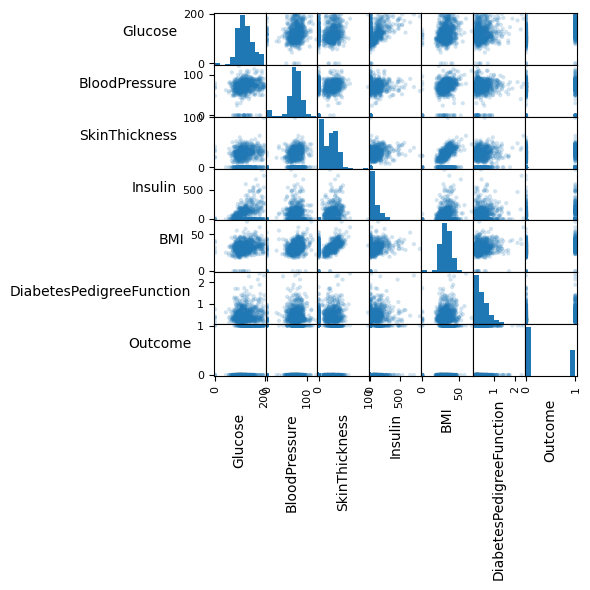

In [948]:
#First I check if there are any patterns in the data when I plot a scatterplot

figDF = rawDF[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Outcome' ]]
fig = scatter_matrix(figDF, alpha=0.2, figsize=(6, 6), diagonal='hist')
for ax in fig.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [949]:
#PLOT ^
# I see the Insulin/Glucose square showing a trend and BMI/SkinThickness also. Next to those I do not see any clear patterns.
# reminder: the DiabetesPedigreeFunction is also a smaller number than the values in the other columns

In [950]:
# to run the model properly the zeros must be replaced. I will replace them with the mean or drop the values. I will do this for the columns below
remove_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']


In [951]:
# with this function I remove the zero's for each column in the variable remove_zeros, and replace them with NaN with the numpy function np.NaN.
# after replacing the zero's with NaN I print how many are missing for each column

# I have made two dataframes rawDF and rawDF2, one model with dropped missing values and the otherone replaced with the mean

for column in remove_zeros:
    rawDF[column] = rawDF[column].replace(0, np.NaN)

print(rawDF.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [952]:
## for Insulin a variable quite important for this model, I see that there are a lot of missing variables
## for a good model I need those variables to be filled, I will have 1 dataframe with all dropped values (removedDF) 
## and 1 dataframe with the NaN's replaced with the mean (meanDF)
removedDF = rawDF.dropna()

#Dataset with the missing values removed
removedDF


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [953]:
## for the second dataframe I will replace the NaN with the mean, I can do this with somewhat the same function 
for column in remove_zeros:
    rawDF2[column] = rawDF2[column].replace(0, np.NaN)
    mean = int(rawDF2[column].mean(skipna=True))
    rawDF2[column] = rawDF2[column].replace(np.NaN, mean)

#Dataset with the missing values replaced with the mean of that column
meanDF = rawDF2
meanDF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [954]:
## for both dataframes removedDF and rawDF2 I want to normalize the values, as the DiabetesPedigreeFunction is out of proportion
# this is done with the function below

def normalize(x):
    return (x - min(x)) / (
        max(x) - min(x)
    ) 

In [955]:
## split datasets and apply the normalize function to the dataframes
# excluding the other columns to be normalized
excluded = ['Outcome']

In [956]:
"""Dataframe with dropped values // kNN 1 """
#normalize the variables
Xdropped = removedDF.drop(excluded, axis=1)
Xdropped = Xdropped.apply(normalize, axis=0)
Xdropped[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin', 'Age']]

#check if the normalize function worked out
Xdropped

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,0.058824,0.232394,0.488372,0.285714,0.096154,0.202454,0.035118,0.000000
4,0.000000,0.570423,0.186047,0.500000,0.185096,0.509202,0.943469,0.200000
6,0.176471,0.154930,0.302326,0.446429,0.088942,0.261759,0.069807,0.083333
8,0.117647,0.992958,0.534884,0.678571,0.635817,0.251534,0.031263,0.533333
13,0.058824,0.936620,0.418605,0.285714,1.000000,0.243354,0.134047,0.633333
...,...,...,...,...,...,...,...,...
753,0.000000,0.880282,0.744186,0.660714,0.596154,0.513292,0.058672,0.083333
755,0.058824,0.507042,0.744186,0.571429,0.115385,0.374233,0.416274,0.266667
760,0.117647,0.225352,0.395349,0.339286,0.002404,0.208589,0.291649,0.016667
763,0.588235,0.316901,0.604651,0.732143,0.199519,0.300613,0.036831,0.700000


In [957]:
"""Dataframe with dropped values/ kNN 1"""
#split the dataset 
ydropped = removedDF['Outcome']
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xdropped, ydropped, test_size=0.3, random_state=42)


In [958]:
#check if dropped test split worked out well 
print(len(Xd_train))
print(len(yd_train))
print(len(Xd_test))
print(len(yd_test))

#to find the optimal k value we take the square root of N (total amount of samples of the dataframe)
total = len(Xd_train) + len(Xd_test)
opt_K_d = math.sqrt(total)
print(f'Optimal k-value for removedDF dataframe = {opt_K_d:.2f}')

#have to round the number to an even number to get it to work in the kNN 
opt_K_dropped = round(opt_K_d)


274
274
118
118
Optimal k-value for removedDF dataframe = 19.80


In [959]:
"""Dataframe with replaced with the mean values // kNN 2"""
Xreplaced = meanDF.drop(excluded, axis=1)
Xreplaced = Xreplaced.apply(normalize, axis=0)
Xreplaced[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin', 'Age']]

#check if the normalize function worked out
Xreplaced

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.169471,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.169471,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.169471,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.469388,0.217391,0.169471,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.239130,0.169471,0.243354,0.115713,0.433333


In [960]:
"""Dataframe with replaced with the mean values // kNN 2"""
#split the dataset 
yreplaced = meanDF['Outcome']
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xreplaced, yreplaced, test_size=0.3, random_state=42)


In [961]:
#check if the repleaced with mean (meanDF) test split worked out well 
print(len(Xr_train))
print(len(yr_train))
print(len(Xr_test))
print(len(yr_test))

#to find the optimal k value we take the square root of N (total amount of samples of the dataframe)
total_r = len(Xr_train) + len(Xr_test)
opt_K_r = math.sqrt(total_r)
print(f'Optimal k-value for meanDF dataframe = {opt_K_r:.2f}')
#have to round the number to an even number to get it to work in the kNN 
opt_K_mean = round(opt_K_r)


537
537
231
231
Optimal k-value for meanDF dataframe = 27.71


In [962]:
#define the kNN for both dataframes, I devide the code in kNN 1 for the removedDF and kNN 2 for the meanDF

#kNN 1 // removedDF dataframe, set the N-value as variable and fit the model
knn_dropped = KNeighborsClassifier(n_neighbors=opt_K_dropped, p=2, metric='euclidean')
knn_dropped.fit(Xd_train.iloc[:,:15], yd_train)
#make the preditions for the test set 
yd_pred = knn_dropped.predict((Xd_test.iloc[:,:15]))

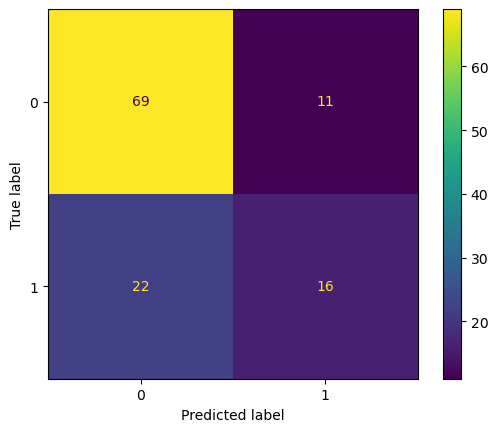

In [963]:
# kNN 1 removedDF  // confusion matrix
cm_dropped = confusion_matrix(yd_test, yd_pred, labels=knn_dropped.classes_)
disp_dropped = ConfusionMatrixDisplay(confusion_matrix=cm_dropped, display_labels=knn_dropped.classes_)
disp_dropped.plot()


In [964]:
#kNN 2 // meanDF dataframe, set the N-value as variable, and fit the model
knn_mean = KNeighborsClassifier(n_neighbors=opt_K_mean, p=2, metric='euclidean')
knn_mean.fit(Xr_train.iloc[:,:15], yr_train)
#make the preditions for the test set 
yr_pred = knn_mean.predict((Xr_test.iloc[:,:15]))



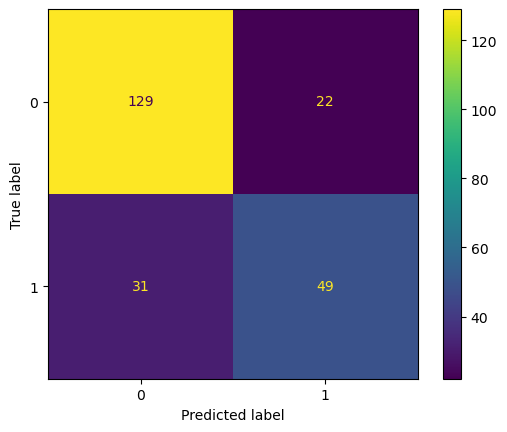

In [965]:
# kNN 2 meanDF  // confusion matrix
cm_mean = confusion_matrix(yr_test, yr_pred, labels=knn_dropped.classes_)
disp_mean = ConfusionMatrixDisplay(confusion_matrix=cm_mean, display_labels=knn_dropped.classes_)
disp_mean.plot()

In [966]:
# Accuracy and F1 scores
#kNN 1 
print(f'kNN 1 removedDF with K={opt_K_dropped}: \n Accuracy score = {accuracy_score(yd_test, yd_pred)*100:.2f}% \n F1 score = {f1_score(yd_test, yd_pred)*100:.2f}% \n')
#kNN 2
print(f'kNN 2, meanDF with K={opt_K_mean}: \n Accuracy score = {accuracy_score(yr_test, yr_pred)*100:.2f}% \n F1 score = {f1_score(yr_test, yr_pred)*100:.2f}%')

kNN 1 removedDF with K=20: 
 Accuracy score = 72.03% 
 F1 score = 49.23% 

kNN 2, meanDF with K=28: 
 Accuracy score = 77.06% 
 F1 score = 64.90%


In [967]:
#kNN 2 preforms better than kNN 1, t see if I can improve the model I will test the following:
# - define new N('s) for model kNN 2 (meanDF)
# - see how the manhattan distance (p) influences the outcome 

In [968]:
# New N-values
# The previous N was the sqrt of all samples. This time I will take the sqrt of the train set and the test set. 

#K-value from train set
train_N = len(Xr_train)
K_train = math.sqrt(train_N)

#K-value from test set 
test_N = len(Xr_test)
K_test = math.sqrt(test_N)

print(f'Two defined K values: \n 1. from the train set = {K_train:.2f} \n 2. from the test set = {K_test:.2f}')
#also both numbers need to be rounded to an even number
K_train = round(K_train)
K_test = round(K_test)

Two defined K values: 
 1. from the train set = 23.17 
 2. from the test set = 15.20


kNN 2 Euclidean, meanDF with K=23: 
 Accuracy score = 74.03% 
 F1 score = 61.54% 



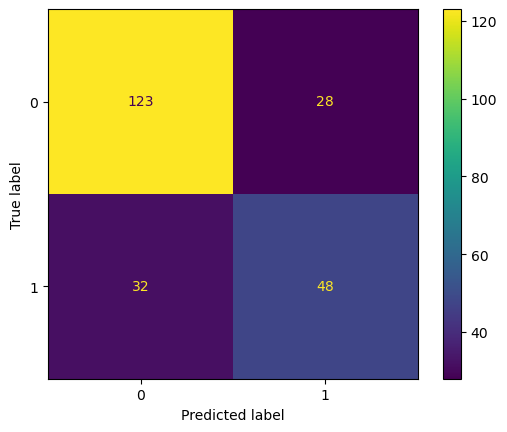

In [969]:
## new model ## 
"""kNN 2.1 - use of K-value Train, euclidean and manhattan"""

#kNN 2.1 Euclidean // meanDF dataframe, set the N-value as variable, and fit the model
knn_2_1E = KNeighborsClassifier(n_neighbors=K_train, p=2, metric='euclidean')
knn_2_1E.fit(Xr_train.iloc[:,:15], yr_train)
#make the preditions for the test set 
yr_predE = knn_2_1E.predict((Xr_test.iloc[:,:15]))
# kNN 2 meanDF  // confusion matrix
cm_2_1 = confusion_matrix(yr_test, yr_predE, labels=knn_2_1E.classes_)
disp_2_1E = ConfusionMatrixDisplay(confusion_matrix=cm_2_1, display_labels=knn_2_1E.classes_)
disp_2_1E.plot()
print(f'kNN 2 Euclidean, meanDF with K={K_train}: \n Accuracy score = {accuracy_score(yr_test, yr_predE)*100:.2f}% \n F1 score = {f1_score(yr_test, yr_predE)*100:.2f}% \n')



kNN 2 Manhattan, meanDF with K=23: 
 Accuracy score = 75.76% 
 F1 score = 64.10% 



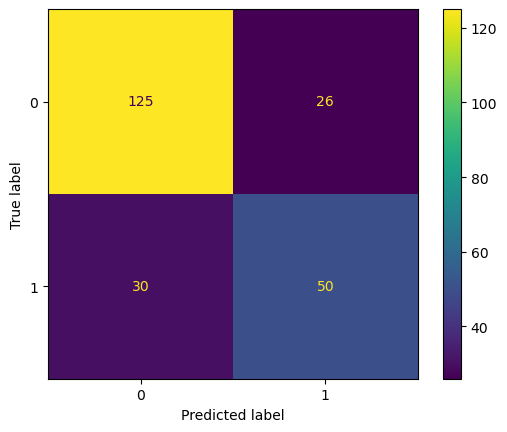

In [970]:
#kNN 2.1 Manhattan // meanDF dataframe, set the N-value as variable, and fit the model
knn_2_1M = KNeighborsClassifier(n_neighbors=K_train, p=1, metric='manhattan')
knn_2_1M.fit(Xr_train.iloc[:,:15], yr_train)
#make the preditions for the test set 
yr_pred2_1 = knn_2_1M.predict((Xr_test.iloc[:,:15]))
# kNN 2 meanDF  // confusion matrix
cm_2_1_M = confusion_matrix(yr_test, yr_pred2_1, labels=knn_2_1M.classes_)
disp_2_1 = ConfusionMatrixDisplay(confusion_matrix=cm_2_1_M, display_labels=knn_2_1M.classes_)
disp_2_1.plot()
print(f'kNN 2 Manhattan, meanDF with K={K_train}: \n Accuracy score = {accuracy_score(yr_test, yr_pred2_1)*100:.2f}% \n F1 score = {f1_score(yr_test, yr_pred2_1)*100:.2f}% \n')


In [971]:
# Making one last test with the other K-value and the Euclidean 

kNN 2 Manhattan distance, meanDF with K=15: 
 Accuracy score = 74.03% 
 F1 score = 61.04% 



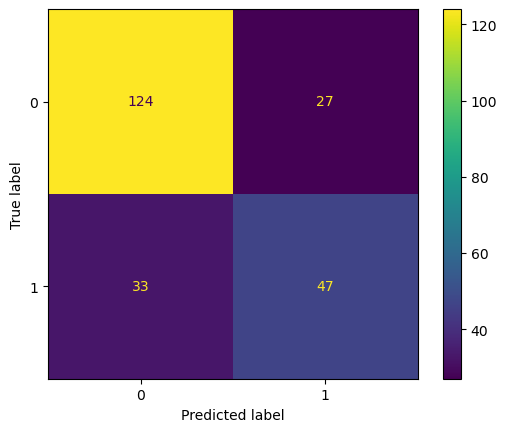

In [972]:
## New model 

#kNN 2.2 Manhattan // meanDF dataframe, set the N-value as variable, and fit the model
knn_2_2 = KNeighborsClassifier(n_neighbors=K_test, p=2, metric='euclidean')
knn_2_2.fit(Xr_train.iloc[:,:15], yr_train)
#make the preditions for the test set 
yr_pred2_2 = knn_2_2.predict((Xr_test.iloc[:,:15]))
# kNN 2 meanDF  // confusion matrix
cm_2_2 = confusion_matrix(yr_test, yr_pred2_2, labels=knn_2_2.classes_)
disp_2_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2_2, display_labels=knn_2_2.classes_)
disp_2_2.plot()
print(f'kNN 2 Manhattan distance, meanDF with K={K_test}: \n Accuracy score = {accuracy_score(yr_test, yr_pred2_2)*100:.2f}% \n F1 score = {f1_score(yr_test, yr_pred2_2)*100:.2f}% \n')


Final kNN 2 Euclidean, meanDF with K=27: 
 Accuracy score = 77.49% 
 F1 score = 66.67% 



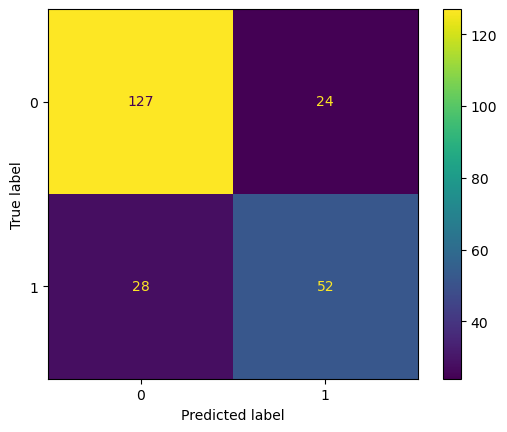

In [973]:
# Manhattan distance is making a small difference in the accuracy score compaired to the Euclidean. Only the model could not be improved. 

"""Final model"""
# The model kNN 2 with came out best, I played around with the K value in this model, the optimal K value = 27, this is almost the same as the sqrt of all samples (28)
# The K value from the sqrt of N should be rounded down
#results below: 

#kNN 2 Final Euclidean // meanDF dataframe, set the N-value as 27, and fit the model
knn_2_final = KNeighborsClassifier(n_neighbors=27, p=2, metric='euclidean')
knn_2_final.fit(Xr_train.iloc[:,:15], yr_train)
#make the preditions for the test set 
yr_predF = knn_2_final.predict((Xr_test.iloc[:,:15]))
# kNN 2 Final meanDF  // confusion matrix
cm_2_final = confusion_matrix(yr_test, yr_predF, labels=knn_2_final.classes_)
disp_2_F = ConfusionMatrixDisplay(confusion_matrix=cm_2_final, display_labels=knn_2_final.classes_)
print(f'Final kNN 2 Euclidean, meanDF with K=27: \n Accuracy score = {accuracy_score(yr_test, yr_predF)*100:.2f}% \n F1 score = {f1_score(yr_test, yr_predF)*100:.2f}% \n')
disp_2_F.plot()



DATA UNDERSTANDING:
At first we saw a graph using matplotlib, which made us understand the data and it visualized if and where there were any patterns to be found.
Gino made clear that he saw a colleration between BMI/Skinthickness and also Insulin/Glucose. However these patterns are more than logical
Gino saw that there were some zero values so he created two data sets
 
DATA PREPERATION:
Gino noticed that there were some zero values on place where this wasn't possible.
So for the first raw dataset:
He deleted those values so the wouldn't influence the module
 
for the second dataset:
he replaced those zero values with the mean of that colum.
He did this to see the difference in 2 datasets and to get de best predictions possible
 
Gino noticed that the Pedigree colum was out of proportion so he used the normalize function to get the rest of the columns in the same porportion as the Pedigree colum
We noticed that this made the rest of the columns more diffcult to understand. Maybe if he did it the other way around it would have been easier to read the new data
 
MODELING AND EVALUATION:
Gino used the kNN module on both datasets and from the accuracy and consufions matrix we could conclude that the module with the means gets batter predictions than the dataset without the outliers
After concluding this Gino went a step further and tried to improve his module. Which is alway a good thing to do
On the dataset with the mean he used the manhathan and Euclidean.
The Manhatan got the best results but wouldn't imporove the model bareley.
 
Gino didn't take that for granted, which is quiet impresive.
He tried to improve the model with playin around with the K-value, so he found the best value which was 27.
It looks like Gino really understood the dataset and wanted to get his module as best as possible.
Wich resulted in an accuracy of 77,5%. Which is quiet impressive, since there are so many other factors that could infulence Diabeters which aren't taken into account in this dataset